# Capstone Project: Digital marketing campaign

In [116]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data Preprocessing

In [125]:
# Loading the dataset
file_path = r"C:\Users\0003n\Desktop\ML\Capstone Projects\digital_marketing_campaign_dataset.xlsx"
df = pd.read_excel(file_path)

# Handling missing values
df = df.dropna()

In [118]:
# Describing the dataset with required fields
df[['ClickThroughRate','ConversionRate','EmailOpens','EmailClicks','Income','AdSpend']].describe()

,ClickThroughRate,ConversionRate,EmailOpens,EmailClicks,Income,AdSpend
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.154829,0.104389,9.476875,4.467375,84664.196750,5000.944830
std,0.084007,0.054878,5.711111,2.856564,37580.387945,2838.038153
min,0.010005,0.010018,0.000000,0.000000,20014.000000,100.054813
25%,0.082635,0.056410,5.000000,2.000000,51744.500000,2523.221165
50%,0.154505,0.104046,9.000000,4.000000,84926.500000,5013.440044
75%,0.228207,0.152077,14.000000,7.000000,116815.750000,7407.989369
max,0.299968,0.199995,19.000000,9.000000,149986.000000,9997.914781


## Exploratory Data Analysis (EDA)

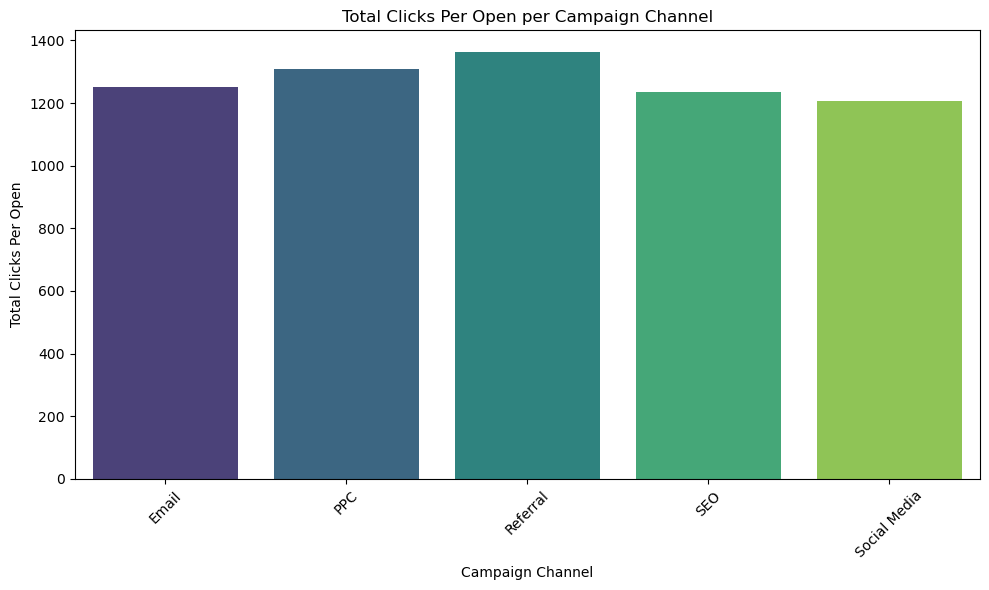

In [119]:
# Creating a new feature: Clicks per Open
# Avoid division by zero by replacing 0 opens with NaN temporarily
df['EmailOpens'] = df['EmailOpens'].replace(0, np.nan)
df['ClicksPerOpen'] = df['EmailClicks'] / df['EmailOpens']

# Replace NaN values with 0 after calculation (for cases where there were no opens)
df['ClicksPerOpen'] = df['ClicksPerOpen'].fillna(0)

#Clicks per Open per Campaign Channel

# Grouping by 'CampaignChannel' and calculating the sum of ClicksPerOpen
clicks_per_open_per_channel = df.groupby('CampaignChannel')['ClicksPerOpen'].sum().reset_index()

# Plotting the total clicks per open per campaign channel
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='ClicksPerOpen', data=clicks_per_open_per_channel, palette='viridis')
plt.title('Total Clicks Per Open per Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total Clicks Per Open')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


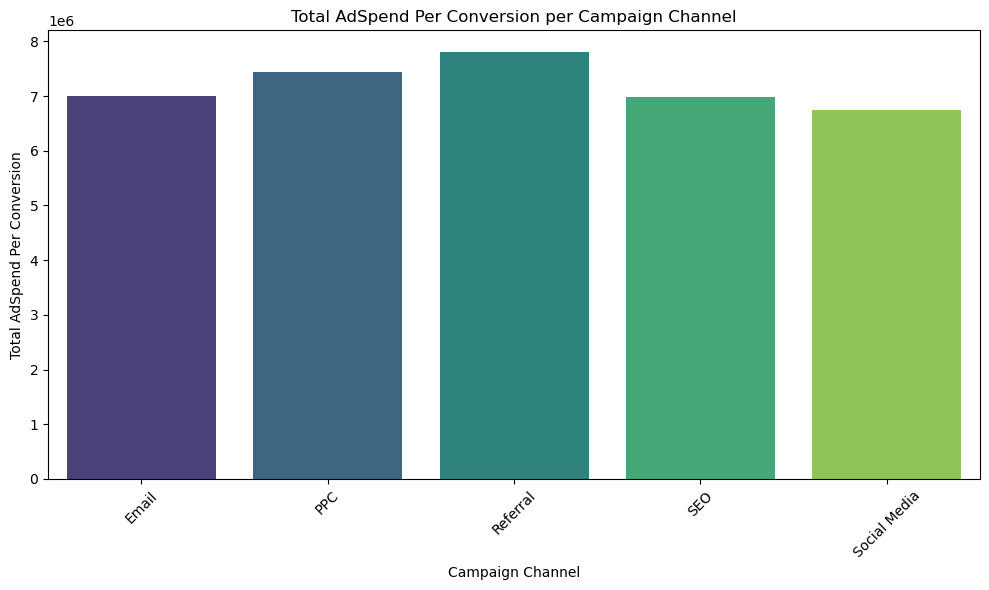

In [121]:
# Creating a new feature: AdSpend per Conversion
# Avoid division by zero by replacing 0 conversions with NaN temporarily
df['Conversion'] = df['Conversion'].replace(0, np.nan)
df['AdSpendPerConversion'] = df['AdSpend'] / df['Conversion']

# Replace NaN values with 0 after calculation (for cases where there were no conversions)
df['AdSpendPerConversion'] = df['AdSpendPerConversion'].fillna(0)

# AdSpend per Conversion per Campaign Channel

# Grouping by 'CampaignChannel' and calculating the sum of AdSpendPerConversion
adspend_per_conversion_per_channel = df.groupby('CampaignChannel')['AdSpendPerConversion'].sum().reset_index()

# Plotting the total AdSpend per conversion per campaign channel
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='AdSpendPerConversion', data=adspend_per_conversion_per_channel, palette='viridis')
plt.title('Total AdSpend Per Conversion per Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Total AdSpend Per Conversion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

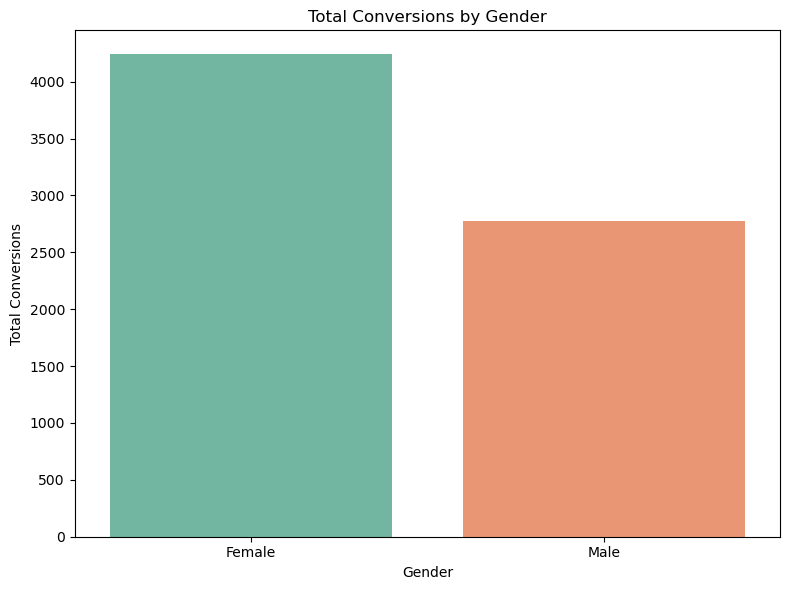

In [78]:
#  Count of Conversions by Gender

# Grouping the data by 'Gender' and counting the number of conversions
conversions_per_gender = df.groupby('Gender')['Conversion'].sum().reset_index()

# Plotting the number of conversions per gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Conversion', data=conversions_per_gender, palette='Set2')
plt.title('Total Conversions by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Conversions')
plt.tight_layout()
plt.show()

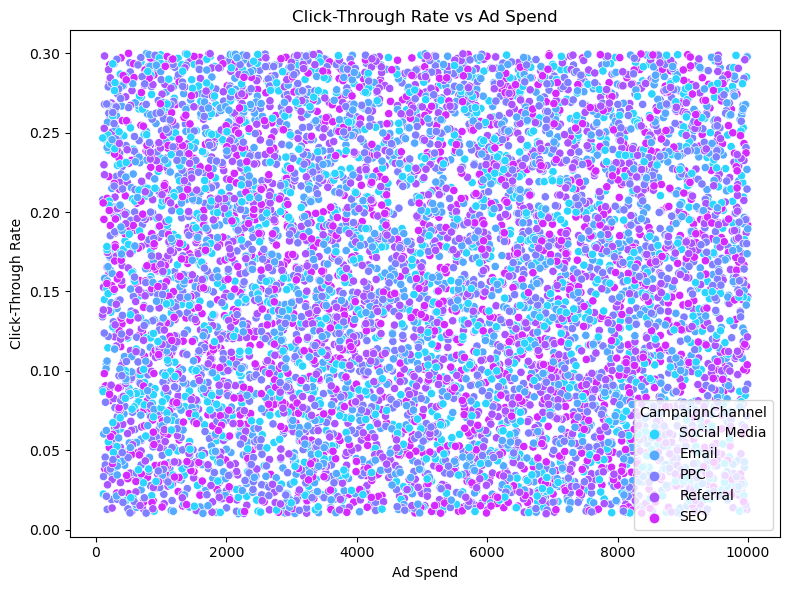

In [122]:
#  Click-Through Rate (CTR) vs Ad Spend (Scatter Plot)

# Scatter plot to see the relationship between Click-Through Rate and Ad Spend
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AdSpend', y='ClickThroughRate', data=df, hue='CampaignChannel', palette='cool')
plt.title('Click-Through Rate vs Ad Spend')
plt.xlabel('Ad Spend')
plt.ylabel('Click-Through Rate')
plt.tight_layout()
plt.show()

### Normalizing Numerical Features

In [128]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])    

# Will Display the first few rows of the preprocessed dataset
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,0.830400,0,1.390381,4,0,0.527484,-1.320328,-0.298084,-1.729507,-1.208303,-0.078268,-1.065759,-0.608829,1.586840,-0.168115,-1.260823,0,0,1
1,8001,1.702775,1,-1.141736,0,3,-0.388418,0.010671,1.427538,1.205221,-1.009576,-0.561778,-1.550199,-1.309262,0.886654,-0.860656,0.677701,0,0,1
2,8002,0.159343,0,0.100905,1,0,-1.217296,1.460225,-0.509632,-1.589758,1.025746,1.435016,-1.723213,0.266712,-0.863810,1.216969,-0.107223,0,0,1
3,8003,-0.780138,0,-1.079865,1,2,-1.572106,-0.204964,-0.298580,1.554594,-0.386761,1.646339,1.356440,-1.309262,-0.863810,-1.553198,-0.019076,0,0,1
4,8004,1.098823,0,-0.018633,1,2,-1.170918,1.166907,0.101164,-1.729507,-1.343379,1.481958,-1.515596,-0.608829,0.536561,1.216969,1.297525,0,0,1


## Model Building

In [129]:
# Split the data into training and testing sets
X = df.drop(['CustomerID', 'Conversion'], axis=1)
y = df['Conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Model Building
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
y_pred2 = model.predict(X_train)

print("Original dataset distribution:\n", y.value_counts(normalize=True))
print("Training set distribution:\n", y_train.value_counts(normalize=True))
print("Test set distribution:\n", y_test.value_counts(normalize=True))

Original dataset distribution:
 Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64
Training set distribution:
 Conversion
1    0.876563
0    0.123438
Name: proportion, dtype: float64
Test set distribution:
 Conversion
1    0.87625
0    0.12375
Name: proportion, dtype: float64


## Model Evaluation 

In [134]:
# Model Evaluation test
class_report = classification_report(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)

print("\nClassification Report of test data:")
print(class_report)

print("\nAccuracy Score:")
print(accuracy)


Classification Report of test data:
              precision    recall  f1-score   support

           0       0.78      0.15      0.25       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.84      0.57      0.59      1600
weighted avg       0.88      0.89      0.85      1600


Accuracy Score:
0.889375


In [135]:
# Model Evaluation train
class_report = classification_report(y_train, y_pred2)
accuracy = accuracy_score(y_train, y_pred2)

print("\nClassification Report of trained data:")
print(class_report)

print("\nAccuracy Score:")
print(accuracy)


Classification Report of trained data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       1.00      1.00      1.00      5610

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


Accuracy Score:
1.0


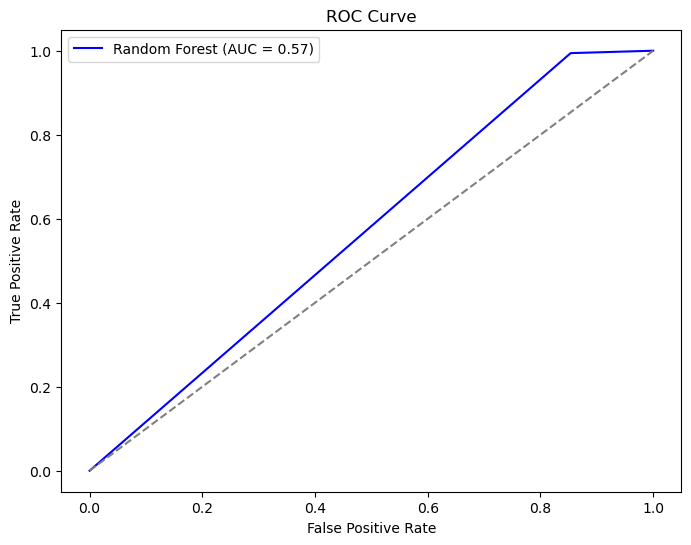

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Model Interpretation

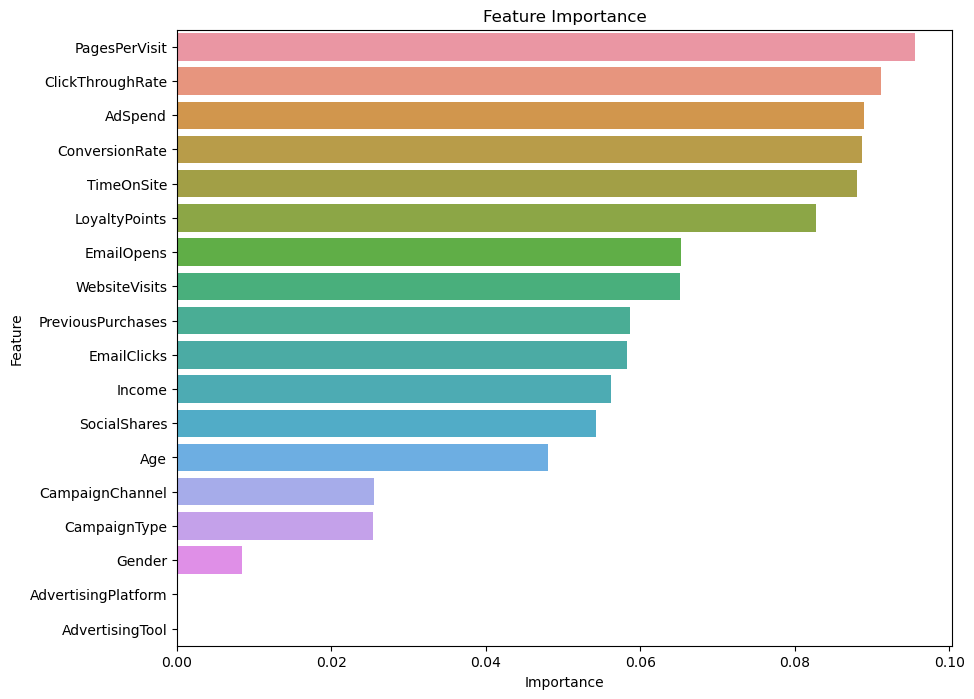

In [133]:
# Model Interpretation

feature_importances = model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()